<a href="https://colab.research.google.com/github/chambeda/ml_finance/blob/main/ACF_PACF_Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2024-03-03 22:09:21--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  66.6MB/s    in 0.4s    

2024-03-03 22:09:21 (66.6 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [3]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [4]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [5]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff()

In [6]:
goog['LogRet'] = log_ret(goog['Close'])

In [7]:
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


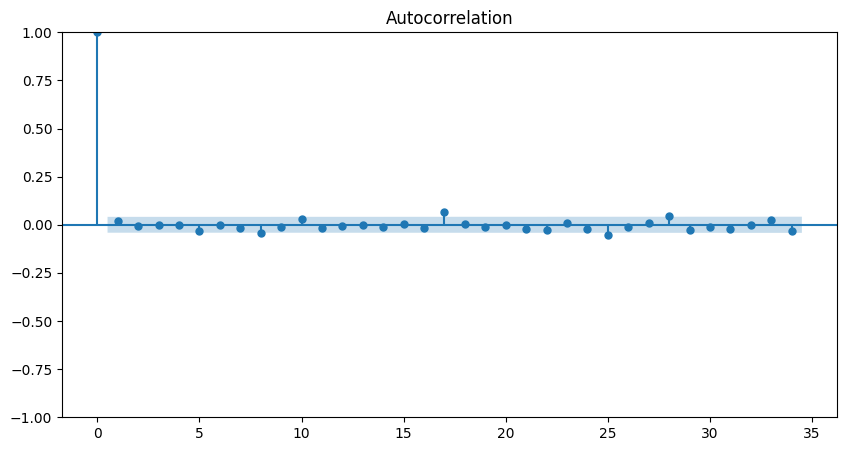

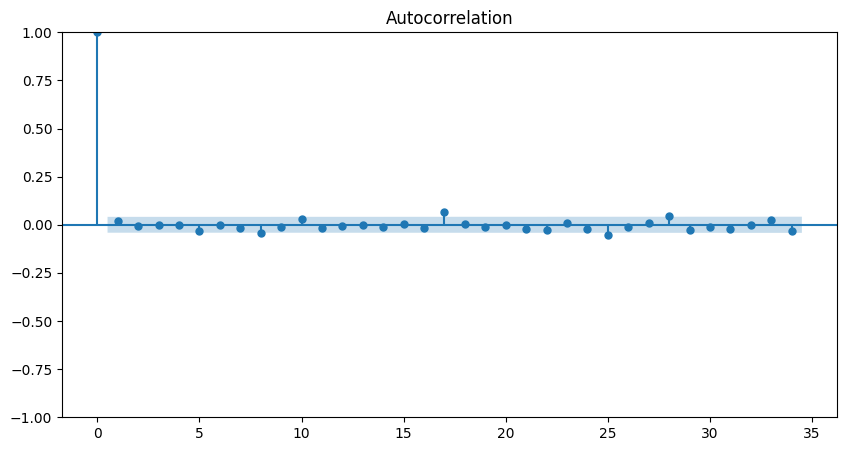

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(goog['LogRet'].dropna(), ax=ax)

In [9]:
aapl = df[df['Name'] == 'AAPL'][['Close']].copy()

In [10]:
aapl['LogRet'] = log_ret(aapl['Close'])

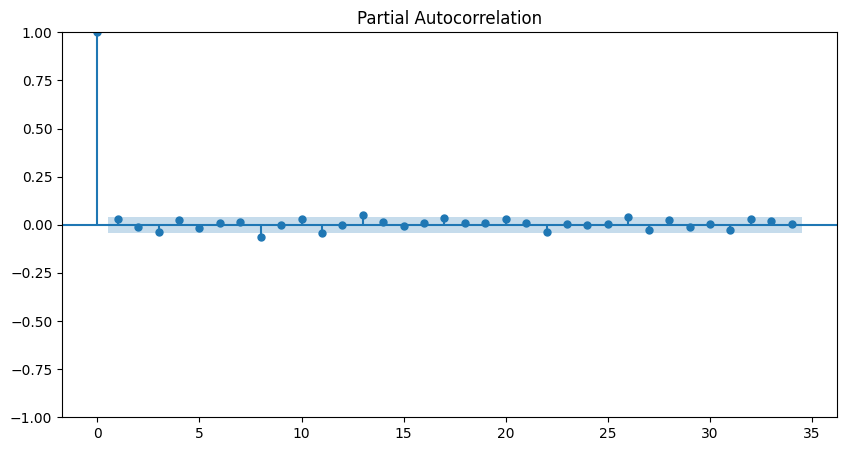

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(aapl['LogRet'].dropna(), ax=ax);